# Clustering, k-means
Cluster the data sets train_smpl, **`train_smpl_<label>`** (apply required filters and/or attribute selections if needed), using the k-means algorithm:
* First try to work in a classical clustering scenario and assume that classes are not given. Research methods which allow you to visualise and analyse clusters (and the performance of the clustering algorithm on your data set).
* Note the accuracy of k-means relative to the given clusters.

In [2]:
 from Scripts import helperfn as hf
 from sklearn.cluster import KMeans
 import numpy as np
 import matplotlib.pyplot as plt


In [140]:
X = hf.get_data_noresults()

Y = hf.get_results(0)
X, Y =hf.balance_by_class(X, Y, size=None, allow_imbalance=False)

In [217]:
# 10 clusters due to 10 classes, or 2 because of reuslt datasheet
kmeans = KMeans(n_clusters=2, max_iter=500).fit(X)

In [195]:
def countSame():
    indiciesPred0 = np.where(kmeans.labels_ == 0)[0]
    indiciesPred1 = np.where(kmeans.labels_ == 1)[0]

    indiciesActual0 = np.where(Y == 0)[0]
    indiciesActual1 = np.where(Y == 1)[0]

    count0 = 0
    count1 = 0
    for i in indiciesPred0:
        if i in indiciesActual0:
            count0 += 1

    for i in indiciesPred1:
        if i in indiciesActual1:
            count1 += 1

    print(count0, " : ", count1)
    return count0 , count1

163  :  140


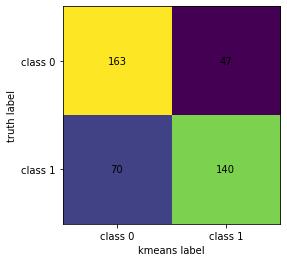

In [218]:
from sklearn.metrics import confusion_matrix
from Scripts import confusionMatrix as mat

cm = confusion_matrix(Y, kmeans.labels_)


# Plot confusion matrix
plt.imshow(cm,interpolation='none')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')

#if true then claster 0 is class 0
if cm[0][0] == countSame()[0]:
    plt.xticks(np.arange(0,2), ['class 0', 'class 1'])
    plt.yticks(np.arange(0,2), ['class 0', 'class 1'])
else:
    plt.xticks(np.arange(0,2), ['class 1', 'class 0'])
    plt.yticks(np.arange(0,2), ['class 1', 'class 0'])

plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [212]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, kmeans.labels_)

0.2785714285714286

In [68]:
N = 1
(unique, counts) = np.unique(kmeans.labels_, return_counts=True)
(unique, actualCount) = np.unique(Y, return_counts=True)
# actualCount = np.sum(Y == 0)


In [40]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({0: 5939, 1: 3751})
